# COMP 494 Final Project

**Author:** Daniel Matlock

**Date:** 4/28/2022

### Housing Prices

#### Dataset: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

### Final Project Requirements:  
There are four sections of the final project. You are expected to perform the following tasks within each section to fulfill the project requirements. 
- **Data Importing and Pre-processing (50 Points)**
    - Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
    - Clean, wrangle, and handle missing data
    - Transform data appropriately using techniques such as aggregation, normalization, and feature construction
    - Reduce redundant data and perform need based discretization
- **Data Analysis and Visualization (50 Points)**
    - Identify categorical, ordinal, and numerical variables within data
    - Provide measures of centrality and distribution with visualizations
    - Diagnose for correlations between variables and determine independent and dependent variables
    - Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest
- **Data Analytics (50 Points)**
    - Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
    - Train, test, and provide accuracy and evaluation metrics for model results
- **Presentation (50 Points)**
    - In a 5 to 10 minute presentation, briefly explain the project workflow from the code and results in your markdown notebook State your findings from the data and provide the interpretation of results from your analysis at each stage in the project

## Table of Contents:
* [Data Importing and Pre-processing](#data-importing)
* [Data Analysis and Visualization](#data-vis)
* [Data Analytics](#data-analytics)

## Data Importing and Pre-processing <a class="anchor" id="data-importing"></a>

In [1]:
#import libraries needed
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#read in file
housing_df = pd.read_csv('house_prices/train.csv')

In [3]:
#check number of rows and columns
housing_df.shape

(1460, 81)

In [4]:
#count the number of categorical variables
cat_count = 0
for dtype in housing_df.dtypes:
    if dtype == 'object':
        cat_count = cat_count + 1

In [5]:
print('# of categorical variables:',cat_count)
print('# of contineous variables:',housing_df.shape[1] - cat_count - 1) #subtract and extra column as 1 column is an ID column

# of categorical variables: 43
# of contineous variables: 37


In [6]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#check the column names
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Handling missing data

In [8]:
#missing data
total = housing_df.isnull().sum().sort_values(ascending=False)
percent = (housing_df.isnull().sum()/housing_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


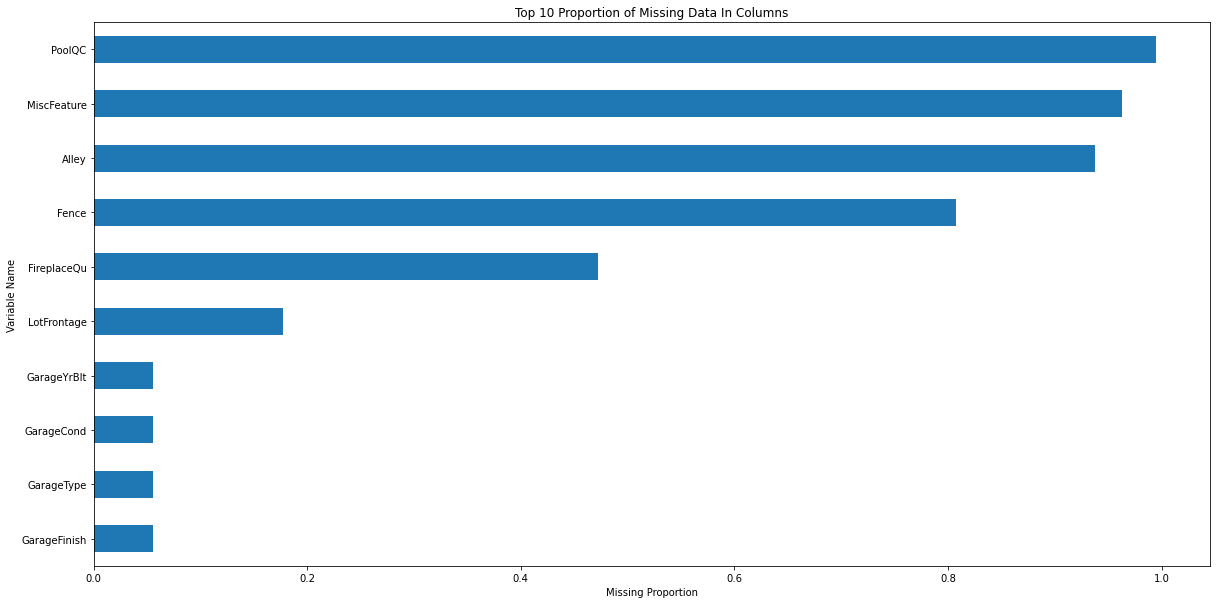

In [9]:
missing_data['Percent'].head(10).plot(kind='barh', figsize = (20,10)).invert_yaxis() #top 10 missing columns
plt.xlabel("Missing Proportion")
plt.ylabel("Variable Name")
plt.title("Top 10 Proportion of Missing Data In Columns")
plt.show()

In [10]:
#dealing with missing data
housing_df["PoolQC"] = housing_df["PoolQC"].fillna("None")
housing_df["MiscFeature"] = housing_df["MiscFeature"].fillna("None")
housing_df["Alley"] = housing_df["Alley"].fillna("None")
housing_df["Fence"] = housing_df["Fence"].fillna("None")
housing_df["FireplaceQu"] = housing_df["FireplaceQu"].fillna("None")

In [11]:
housing_df["LotFrontage"] = housing_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [12]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    housing_df[col] = housing_df[col].fillna('None')

In [13]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    housing_df[col] = housing_df[col].fillna(0)

In [14]:
housing_df["MasVnrType"] = housing_df["MasVnrType"].fillna("None")
housing_df["MasVnrArea"] = housing_df["MasVnrArea"].fillna(0)
housing_df['MSZoning'] = housing_df['MSZoning'].fillna(housing_df['MSZoning'].mode()[0])
housing_df = housing_df.drop(['Utilities'], axis=1)
housing_df["Functional"] = housing_df["Functional"].fillna("Typ")
housing_df['Electrical'] = housing_df['Electrical'].fillna(housing_df['Electrical'].mode()[0])
housing_df['KitchenQual'] = housing_df['KitchenQual'].fillna(housing_df['KitchenQual'].mode()[0])
housing_df['Exterior1st'] = housing_df['Exterior1st'].fillna(housing_df['Exterior1st'].mode()[0])
housing_df['Exterior2nd'] = housing_df['Exterior2nd'].fillna(housing_df['Exterior2nd'].mode()[0])
housing_df['SaleType'] = housing_df['SaleType'].fillna(housing_df['SaleType'].mode()[0])
housing_df['MSSubClass'] = housing_df['MSSubClass'].fillna("None")

In [15]:
#Check remaining missing values if any 
all_data_na = (housing_df.isnull().sum() / len(housing_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### Handling Outliers

#### Target Variable

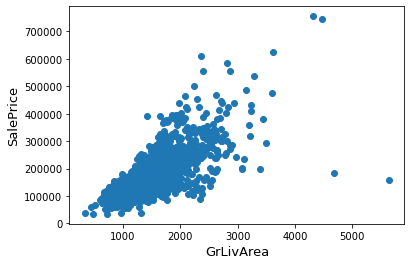

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = housing_df['GrLivArea'], y = housing_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

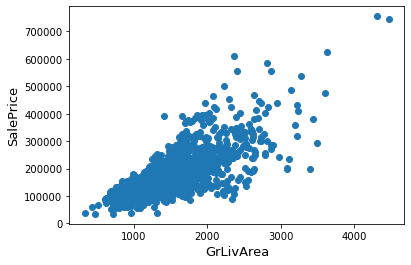

In [17]:
#Deleting outliers
housing_df = housing_df.drop(housing_df[(housing_df['GrLivArea']>4000) & (housing_df['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(housing_df['GrLivArea'], housing_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### Normalize Target Variable


 mu = 180932.92 and sigma = 79467.79



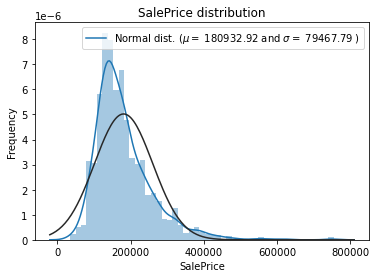

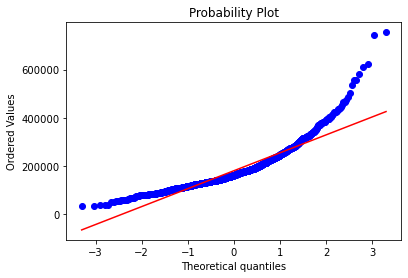

In [18]:
sns.distplot(housing_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(housing_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = probplot(housing_df['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



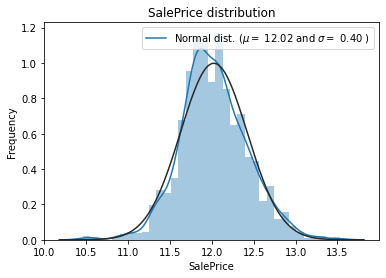

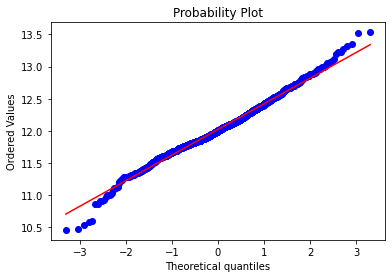

In [19]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
housing_df["SalePrice"] = np.log1p(housing_df["SalePrice"])

#Check the new distribution 
sns.distplot(housing_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(housing_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = probplot(housing_df['SalePrice'], plot=plt)
plt.show()

## Data Analysis and Visualization <a class="anchor" id="data-vis"></a>

In [20]:
from sklearn.preprocessing import LabelEncoder

Target Variable Scatterplots

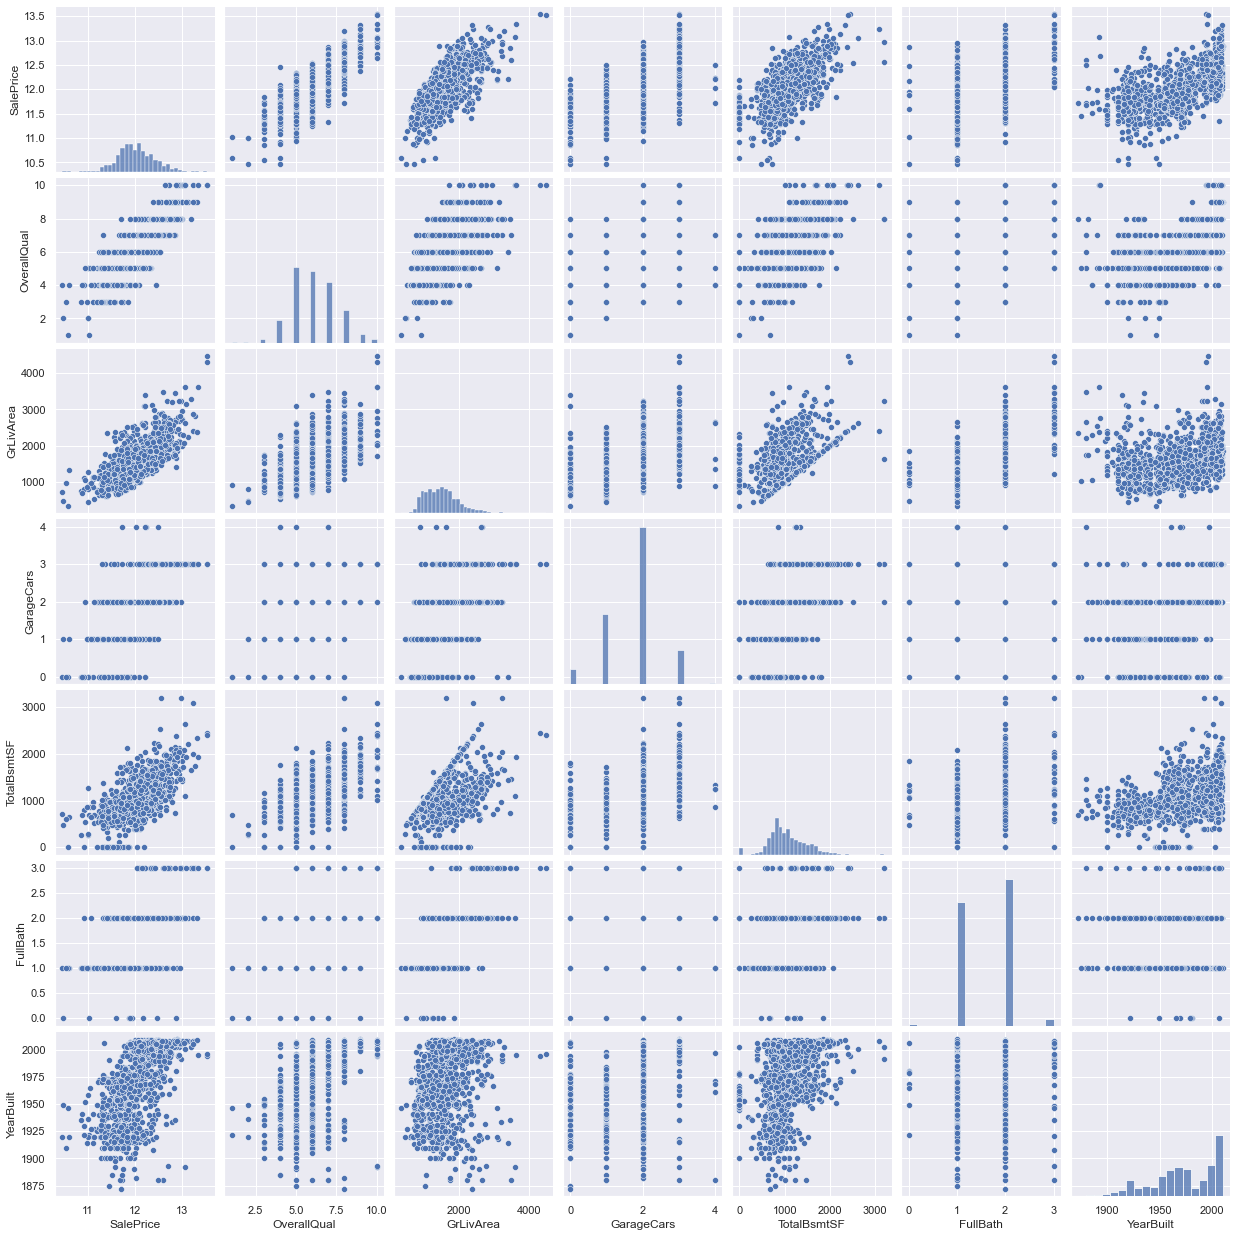

In [21]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing_df[cols], size = 2.5)
plt.show();

Correlation Matrix

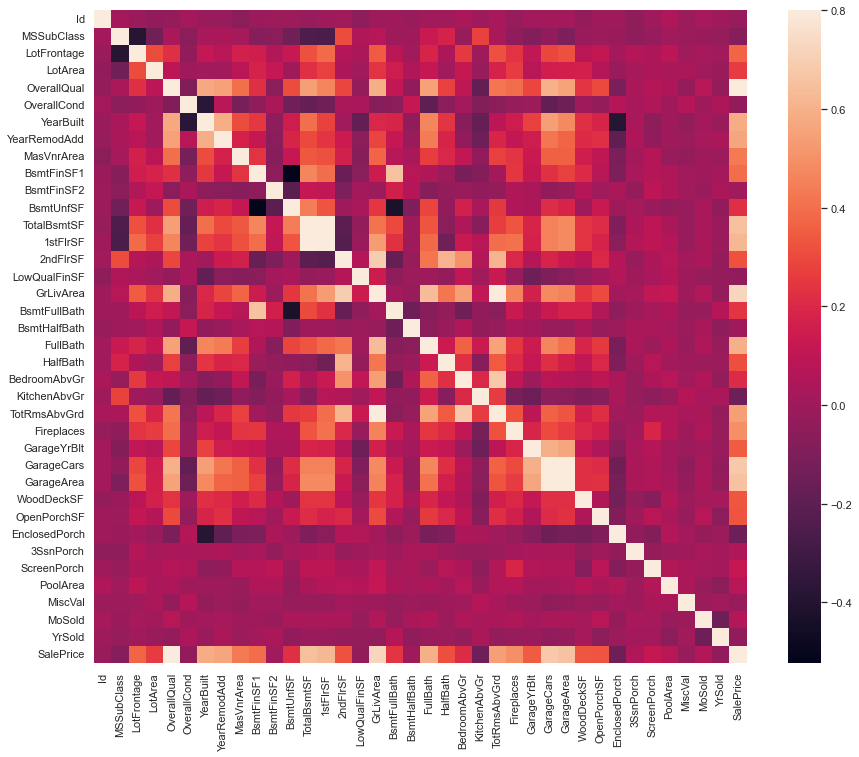

In [22]:
#Correlation map to see how features are correlated with SalePrice
corrmat = housing_df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

In [23]:
#MSSubClass=The building class
housing_df['MSSubClass'] = housing_df['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
housing_df['OverallCond'] = housing_df['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
housing_df['YrSold'] = housing_df['YrSold'].astype(str)
housing_df['MoSold'] = housing_df['MoSold'].astype(str)

# Adding total sqfootage feature 
housing_df['TotalSF'] = housing_df['TotalBsmtSF'] + housing_df['1stFlrSF'] + housing_df['2ndFlrSF']

#### Label encode categorical variables

In [24]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(housing_df[c].values)) 
    housing_df[c] = lbl.transform(list(housing_df[c].values))

# shape        
print('Shape housing_df: {}'.format(housing_df.shape))

Shape housing_df: (1458, 81)


In [25]:
numeric_feats = housing_df.dtypes[housing_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = housing_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688
LandSlope,4.805032
KitchenAbvGr,4.480268
BsmtFinSF2,4.247550
ScreenPorch,4.114690
BsmtHalfBath,4.095895


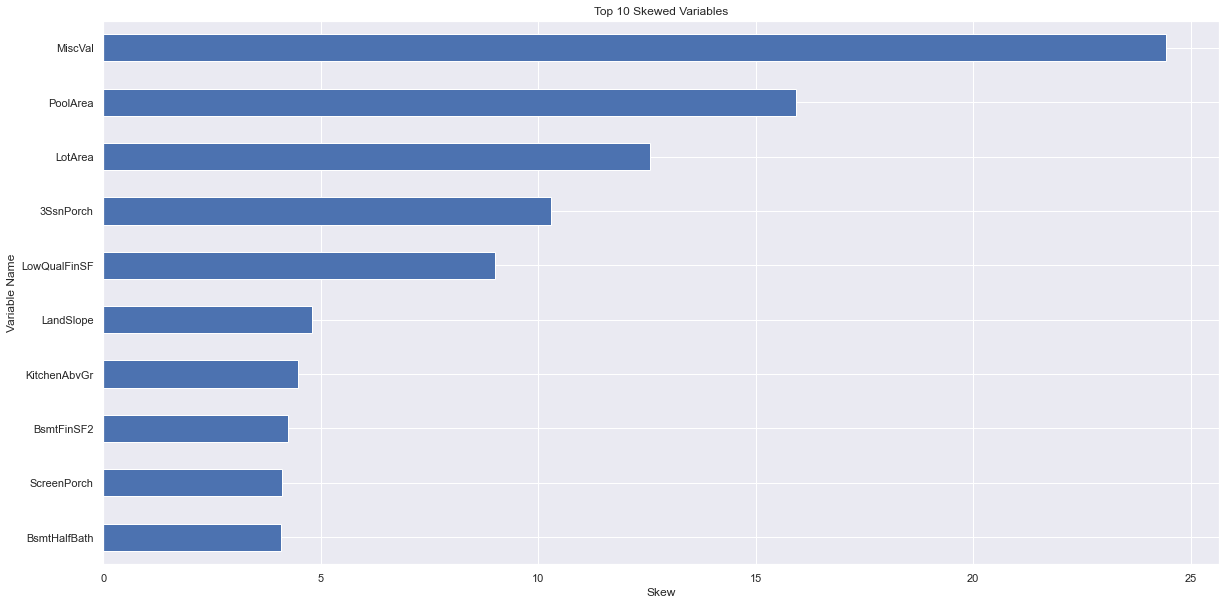

In [26]:
skewness['Skew'].head(10).plot(kind='barh', figsize = (20,10)).invert_yaxis() #top 10 missing columns
plt.xlabel("Skew")
plt.ylabel("Variable Name")
plt.title("Top 10 Skewed Variables")
plt.show()

In [27]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform (normalize)".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    housing_df[feat] = boxcox1p(housing_df[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 61 skewed numerical features to Box Cox transform (normalize)


In [28]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,0.730463,2.750250,RL,5.831328,19.212182,0.730463,0.730463,1.540963,Lvl,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,2.440268,1.820334,14.187527,14.187527,Gable,CompShg,VinylSd,VinylSd,BrkFace,8.059126,1.194318,1.820334,PConc,1.194318,1.820334,1.540963,1.194318,11.170327,2.259674,0.0,7.483296,11.692623,GasA,0.000000,0.730463,SBrkr,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,1.540963,Attchd,14.187527,1.194318,1.194318,10.506271,2.055642,2.055642,1.194318,0.000000,5.714669,0.000000,0.0,0.0,0.0,1.540963,1.820334,None,0.0,1.820334,1.194318,WD,Normal,3.156009,14.976591
1,1.194318,1.820334,RL,6.221214,19.712205,0.730463,0.730463,1.540963,Lvl,FR2,0.0,Veenker,Feedr,Norm,1Fam,1Story,2.259674,2.440268,14.145138,14.145138,Gable,CompShg,MetalSd,MetalSd,None,0.000000,1.540963,1.820334,CBlock,1.194318,1.820334,0.730463,0.000000,12.062832,2.259674,0.0,8.897844,12.792276,GasA,0.000000,0.730463,SBrkr,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,1.540963,2.259674,2.259674,0.730463,2.055642,Attchd,14.145138,1.194318,1.194318,10.062098,2.055642,2.055642,1.194318,9.010206,0.000000,0.000000,0.0,0.0,0.0,1.540963,1.820334,None,0.0,2.440268,0.730463,WD,Normal,3.140516,14.923100
2,1.540963,2.750250,RL,5.914940,20.347241,0.730463,0.730463,0.000000,Lvl,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,2.440268,1.820334,14.184404,14.185966,Gable,CompShg,VinylSd,VinylSd,BrkFace,7.646538,1.194318,1.820334,PConc,1.194318,1.820334,1.194318,1.194318,10.200343,2.259674,0.0,9.917060,11.892039,GasA,0.000000,0.730463,SBrkr,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.259674,2.259674,0.730463,2.055642,Attchd,14.184404,1.194318,1.194318,10.775536,2.055642,2.055642,1.194318,0.000000,5.053371,0.000000,0.0,0.0,0.0,1.540963,1.820334,None,0.0,3.011340,1.194318,WD,Normal,3.163719,15.149678
3,1.820334,2.885846,RL,5.684507,19.691553,0.730463,0.730463,0.000000,Lvl,Corner,0.0,Crawfor,Norm,Norm,1Fam,2Story,2.440268,1.820334,14.047529,14.135652,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,1.540963,1.820334,BrkTil,1.820334,0.730463,1.540963,0.000000,8.274266,2.259674,0.0,10.468500,11.354094,GasA,1.194318,0.730463,SBrkr,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,1.194318,2.440268,2.259674,0.730463,1.194318,Detchd,14.179714,1.540963,1.540963,10.918253,2.055642,2.055642,1.194318,0.000000,4.745132,8.797736,0.0,0.0,0.0,1.540963,1.820334,None,0.0,1.820334,0.000000,WD,Abnorml,3.111134,14.857121
4,2.055642,2.750250,RL,6.314735,21.325160,0.730463,0.730463,0.000000,Lvl,FR2,0.0,NoRidge,Norm,Norm,1Fam,2Story,2.602594,1.820334,14.182841,14.182841,Gable,CompShg,VinylSd,VinylSd,BrkFace,9.391827,1.194318,1.820334,PConc,1.194318,1.820334,0.000000,1.194318,10.971129,2.259674,0.0,10.221051,12.510588,GasA,0.000000,0.730463,SBrkr,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,1.194318,2.750250,2.259674,0.730463,2.055642,Attchd,14.182841,1.194318,1.540963,11.627708,2.055642,2.055642,1.194318,8.013884,6.314735,0.000000,

In [29]:
housing_df = pd.get_dummies(housing_df)
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.730463,2.750250,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,14.187527,14.187527,8.059126,1.194318,1.820334,1.194318,1.820334,1.540963,1.194318,11.170327,2.259674,0.0,7.483296,11.692623,0.000000,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,1.540963,14.187527,1.194318,1.194318,10.506271,2.055642,2.055642,1.194318,0.000000,5.714669,0.000000,0.0,0.0,0.0,1.540963,1.820334,0.0,1.820334,1.194318,3.156009,14.976

## Data Analytics <a class="anchor" id="data-analytics"></a>

In [30]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb

In [31]:
train_df = housing_df[housing_df.columns.difference(['Id', 'SalePrice'])]

In [32]:
#Validation function
n_folds = 5

def rmse_cv(model,n_folds):
    kf=KFold(n_splits=n_folds)
    rmse = np.sqrt(-cross_val_score(model, train_df, housing_df.SalePrice, scoring="neg_mean_squared_error", cv = kf))
    return rmse

In [33]:
lr_w_int = LinearRegression()
lr_no_int = LinearRegression(fit_intercept=False)

In [34]:
neigh = KNeighborsRegressor(n_neighbors=10)

In [35]:
rf = RandomForestRegressor(n_estimators=100)

In [36]:
dt = DecisionTreeRegressor(max_depth = 10)

In [37]:
model_xgb = xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.01)

In [38]:
model_lgb = lgb.LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000)

#### Algotithm Results on a 5 Fold Cross Validation

In [39]:
score_linear = rmse_cv(lr_w_int,n_folds)
print("Linear Regression (w/ Intercept) score: {:.4f} ({:.4f})\n".format(score_linear.mean(), score_linear.std()))

Linear Regression (w/ Intercept) score: 16839339.5654 (14059441.9090)



Linear regression does not generalize well. Removing the intercept adds something called regularization that generalizes better.

In [40]:
score_linear_no_int = rmse_cv(lr_no_int,n_folds)
print("Linear Regression (No Intercept) score: {:.4f} ({:.4f})\n".format(score_linear_no_int.mean(), score_linear_no_int.std()))

Linear Regression (No Intercept) score: 0.0145 (0.0011)



In [41]:
score_neigh = rmse_cv(neigh,n_folds)
print("Nearest Neighbor (13) score: {:.4f} ({:.4f})\n".format(score_neigh.mean(), score_neigh.std()))

Nearest Neighbor (13) score: 0.0269 (0.0016)



In [42]:
score_dt = rmse_cv(dt,n_folds)
print("Decision Tree Regression score: {:.4f} ({:.4f})\n".format(score_dt.mean(), score_dt.std()))

Decision Tree Regression score: 0.0234 (0.0011)



In [43]:
score_rf = rmse_cv(rf,n_folds)
print("Random Forest Regression score: {:.4f} ({:.4f})\n".format(score_rf.mean(), score_rf.std()))

Random Forest Regression score: 0.0157 (0.0003)



In [44]:
score_xg = rmse_cv(model_xgb,n_folds)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score_xg.mean(), score_xg.std()))

Xgboost score: 0.0139 (0.0006)



In [45]:
score_lgbm = rmse_cv(model_lgb,n_folds)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score_lgbm.mean(), score_lgbm.std()))

LGBM score: 0.0142 (0.0006)



In [46]:
#plot RMSE and STD for each Algorithm
data = {'Linear (No Intercept)':[score_linear_no_int.mean(),score_linear_no_int.std()], 'XGBoost':[score_xg.mean(),score_xg.std()], 'Random Forest': [score_rf.mean(),score_rf.std()]
        , 'LightGBM': [score_lgbm.mean(),score_lgbm.std()], 'Decision Tree': [score_dt.mean(),score_dt.std()],'Nearest Neighbor': [score_neigh.mean(),score_neigh.std()]}
data_df = pd.DataFrame(data=data).T.reset_index().sort_values(by = [0],ascending = True)
data_df.columns = ['Algorithm','RMSE','STD']

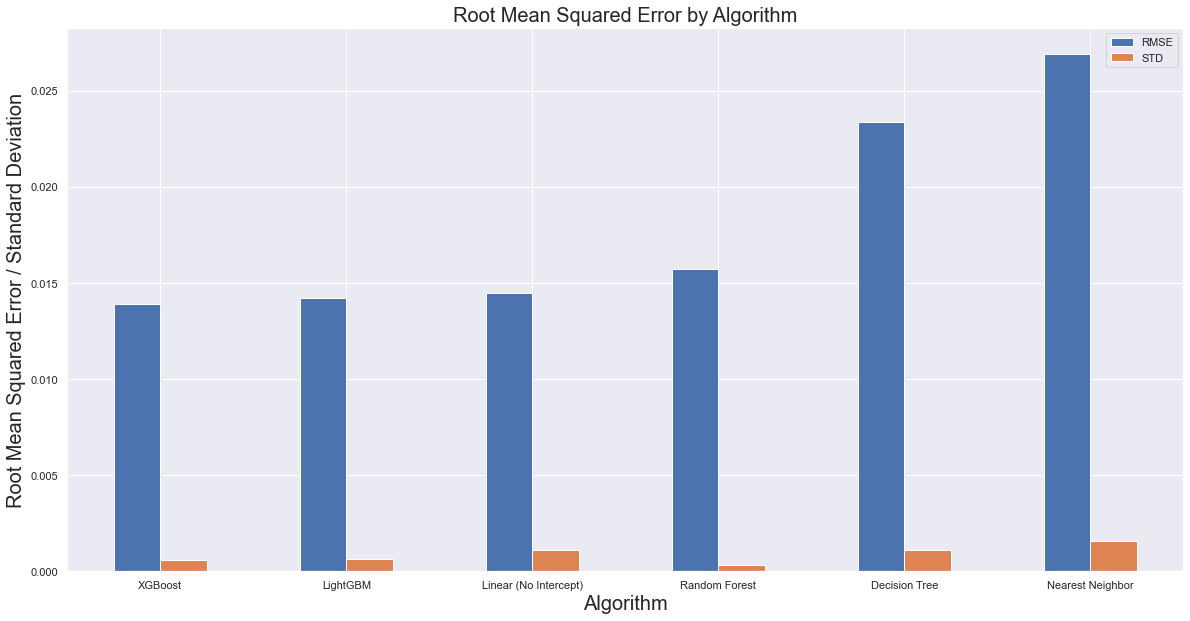

In [47]:
# creating the bar plot
data_df.plot(kind='bar',x = 'Algorithm', y = ['RMSE', 'STD'], figsize = (20,10), rot=0)
plt.xlabel("Algorithm",fontsize=20)
plt.ylabel("Root Mean Squared Error / Standard Deviation",fontsize=20)
plt.title("Root Mean Squared Error by Algorithm",fontsize=20)
plt.show()

We see that the GBM algorithms (XGBoost and LightGBM) tend to slightly perform the best.

### Variable Importance Plot

Only applies to tree based models (Decision Trees, Random Forest, GBMs)

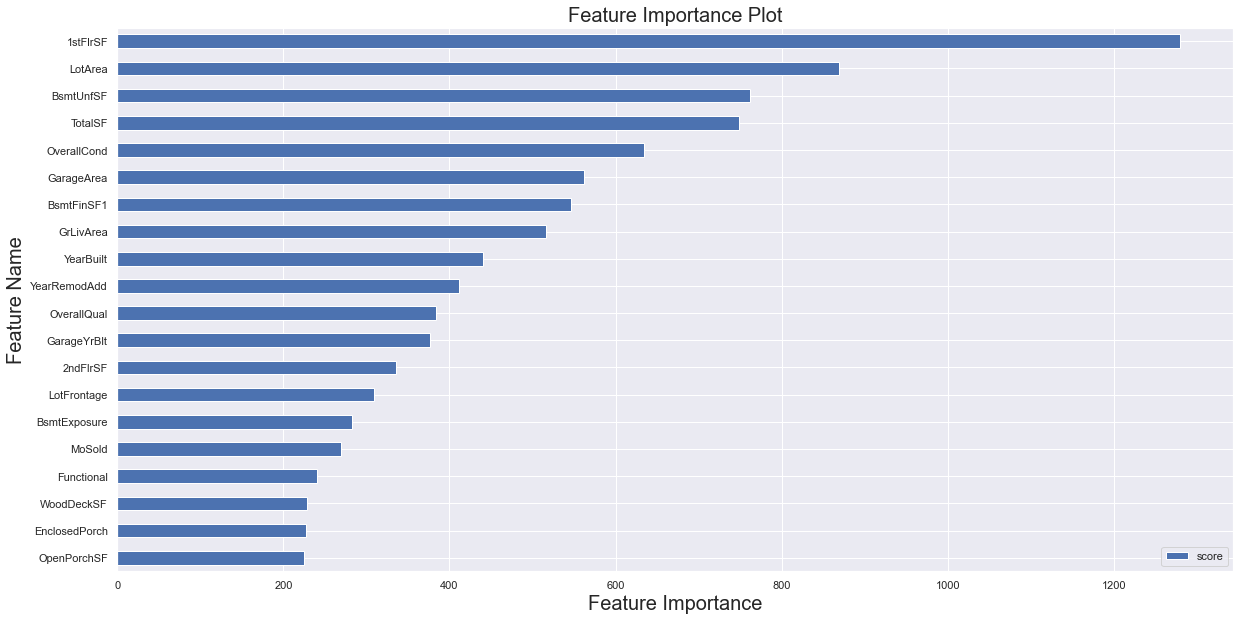

In [48]:
model = model_xgb.fit(train_df, housing_df.SalePrice) #fit model on entire dataset to get variable importance since we fit it on each fold
feature_important = model.get_booster().get_score(importance_type='weight')

keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data[:20].plot(kind='barh', figsize = (20,10)).invert_yaxis(); ## plot top 20 features
plt.xlabel("Feature Importance",fontsize=20)
plt.ylabel("Feature Name",fontsize=20)
plt.title("Feature Importance Plot",fontsize=20)
plt.show()